# Model Log 2

- Author: Wen Xin
- Description: This file is about to log part of features to see whether it can improve the model or not.

In [107]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [108]:
data=pd.read_csv('data_cleaned.csv')

In [109]:
X=data
y=data['label']
X=X.drop(['label'],axis=1)

In [110]:
weekly_features=['total_orders', 'w1_total_orders', 'w2_total_orders', 'w3_total_orders',\
       'w4_total_orders', 'w5_total_orders', 'w6_total_orders',\
       'w7_total_orders', 'total_couponworth', 'w1_total_couponworth',\
       'w2_total_couponworth', 'w3_total_couponworth', 'w4_total_couponworth',\
       'w5_total_couponworth', 'w6_total_couponworth', 'w7_total_couponworth']

In [111]:
for f in weekly_features:
    X[f] = np.log1p(X[f])

In [125]:
time_features=['overall_time_mean', 'update2create_time_mean', 'send2update_time_mean',
       'overall_time_min', 'update2create_time_min', 'send2update_time_min',
       'overall_time_max', 'update2create_time_max', 'send2update_time_max']

In [126]:
for f in time_features:
    X[f] = np.log1p(X[f])

In [127]:
X=X.fillna(0)

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
from sklearn.linear_model import RidgeClassifier

In [130]:
ridge=RidgeClassifier()
ridge.fit(X_train,y_train)
ridge_predict=ridge.predict(X_test)

In [131]:
from sklearn import metrics

In [132]:
print(metrics.classification_report(y_test, ridge_predict))

             precision    recall  f1-score   support

        0.0       0.84      0.93      0.88     27045
        1.0       0.77      0.57      0.65     11328

avg / total       0.82      0.82      0.81     38373



In [133]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds2 = roc_curve(y_test,ridge_predict)

Text(0.5,1,'ROC curve')

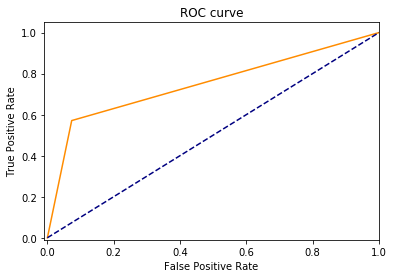

In [134]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange',label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
# plt.plot(0.16, 0.95, 'o', markersize=5, fillstyle='none', c='r', mew=3)

In [135]:
# baseline1

In [136]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ridge_predict)

0.7489400953291908

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scaler = StandardScaler()

In [139]:
X_train2=scaler.fit_transform(X_train)
X_test2=scaler.transform(X_test)

In [140]:
ridge2=RidgeClassifier()
ridge2.fit(X_train2,y_train)
ridge_predict2=ridge2.predict(X_test2)

In [141]:
fpr, tpr, thresholds2 = roc_curve(y_test,ridge_predict2)

Text(0.5,1,'ROC curve')

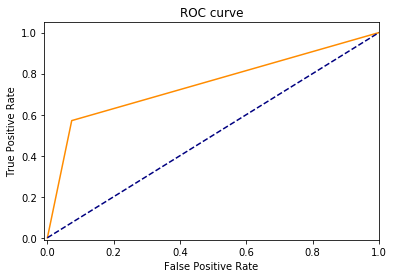

In [142]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='darkorange',label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
# plt.plot(0.16, 0.95, 'o', markersize=5, fillstyle='none', c='r', mew=3)

In [143]:
# baseline2
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ridge_predict2)

0.748833330787357